In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [109]:
df = pd.DataFrame(pd.read_csv("car_price.csv"))
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [110]:
len(set(df['name']))

147

independent->fueltypes, aspiration, doornumbers, engine location, wheelbase, carlength, carwidth, carheight, enginesize, boreratio,stroke, compressionratio, horsepower, peakrpm, citympg,highwaympg

dependent->price
columns with more than two categories->carbody,drivewheels, enginetype, cylindernumber,fuelsystem

In [111]:
correlation_matrix = df.corr()

# Extract the correlation of each feature with the target variable 'price'
correlation_with_price = correlation_matrix["price"].sort_values(ascending=False)
correlation_with_price

C:\Users\Dell\AppData\Local\Temp\ipykernel_22792\2174226677.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
ID                 -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [112]:
new=df[['fueltypes', 'aspiration', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio','stroke', 'compressionratio','horsepower','price']]
new

,fueltypes,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,gas,std,front,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,13495.0
1,gas,std,front,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,16500.0
2,gas,std,front,94.5,171.2,65.5,52.4,152,2.68,3.47,9.0,154,16500.0
3,gas,std,front,99.8,176.6,66.2,54.3,109,3.19,3.40,10.0,102,13950.0
4,gas,std,front,99.4,176.6,66.4,54.3,136,3.19,3.40,8.0,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,front,109.1,188.8,68.9,55.5,141,3.78,3.15,9.5,114,16845.0
201,gas,turbo,front,109.1,188.8,68.8,55.5,141,3.78,3.15,8.7,160,19045.0
202,gas,std,front,109.1,188.8,68.9,55.5,173,3.58,2.87,8.8,134,21485.0
203,diesel,turbo,front,109.1,188.8,68.9,55.5,145,3.01,3.40,23.0,106,22470.0


In [113]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltypes         205 non-null    object 
 1   aspiration        205 non-null    object 
 2   enginelocation    205 non-null    object 
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  price             205 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 20.9+ KB


In [114]:
new.shape

(205, 13)

In [115]:
new.describe()

,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,126.907317,3.329756,3.255415,10.142537,104.117073,13276.710571
std,6.021776,12.337289,2.145204,2.443522,41.642693,0.270844,0.313597,3.972040,39.544167,7988.852332
min,86.600000,141.100000,60.300000,47.800000,61.000000,2.540000,2.070000,7.000000,48.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,97.000000,3.150000,3.110000,8.600000,70.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,120.000000,3.310000,3.290000,9.000000,95.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,141.000000,3.580000,3.410000,9.400000,116.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,326.000000,3.940000,4.170000,23.000000,288.000000,45400.000000


In [116]:
new.isna().sum()

fueltypes           0
aspiration          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
price               0
dtype: int64

In [117]:
new.dropna()

,fueltypes,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,gas,std,front,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,13495.0
1,gas,std,front,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,16500.0
2,gas,std,front,94.5,171.2,65.5,52.4,152,2.68,3.47,9.0,154,16500.0
3,gas,std,front,99.8,176.6,66.2,54.3,109,3.19,3.40,10.0,102,13950.0
4,gas,std,front,99.4,176.6,66.4,54.3,136,3.19,3.40,8.0,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,front,109.1,188.8,68.9,55.5,141,3.78,3.15,9.5,114,16845.0
201,gas,turbo,front,109.1,188.8,68.8,55.5,141,3.78,3.15,8.7,160,19045.0
202,gas,std,front,109.1,188.8,68.9,55.5,173,3.58,2.87,8.8,134,21485.0
203,diesel,turbo,front,109.1,188.8,68.9,55.5,145,3.01,3.40,23.0,106,22470.0


In [118]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltypes         205 non-null    object 
 1   aspiration        205 non-null    object 
 2   enginelocation    205 non-null    object 
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  price             205 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 20.9+ KB


In [119]:
# sns.pairplot(new)  fueltypes  aspiration   enginelocation 

In [120]:
fuel_typ = pd.get_dummies(new['fueltypes'], drop_first = False)
fuel_typ

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [121]:
aspira_tion = pd.get_dummies(new['aspiration'], drop_first = False)
aspira_tion

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [122]:
engine_location = pd.get_dummies(new['enginelocation'], drop_first = False)
engine_location

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,1,0
202,1,0
203,1,0


In [123]:
new = pd.concat([new, fuel_typ,engine_location,aspira_tion], axis = 1)
new

,fueltypes,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,price,diesel,gas,front,rear,std,turbo
0,gas,std,front,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,13495.0,0,1,1,0,1,0
1,gas,std,front,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,16500.0,0,1,1,0,1,0
2,gas,std,front,94.5,171.2,65.5,52.4,152,2.68,3.47,9.0,154,16500.0,0,1,1,0,1,0
3,gas,std,front,99.8,176.6,66.2,54.3,109,3.19,3.40,10.0,102,13950.0,0,1,1,0,1,0
4,gas,std,front,99.4,176.6,66.4,54.3,136,3.19,3.40,8.0,115,17450.0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,front,109.1,188.8,68.9,55.5,141,3.78,3.15,9.5,114,16845.0,0,1,1,0,1,0
201,gas,turbo,front,109.1,188.8,68.8,55.5,141,3.78,3.15,8.7,160,19045.0,0,1,1,0,0,1
202,gas,std,front,109.1,188.8,68.9,55.5,173,3.58,2.87,8.8,134,21485.0,0,1,1,0,1,0
203,diesel,turbo,front,109.1,188.8,68.9,55.5,145,3.01,3.40,23.0,106,22470.0,1,0,1,0,0,1


In [124]:
new.drop(['fueltypes', 'aspiration','enginelocation'], axis = 1, inplace = True)
new

,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,price,diesel,gas,front,rear,std,turbo
0,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,13495.0,0,1,1,0,1,0
1,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,16500.0,0,1,1,0,1,0
2,94.5,171.2,65.5,52.4,152,2.68,3.47,9.0,154,16500.0,0,1,1,0,1,0
3,99.8,176.6,66.2,54.3,109,3.19,3.40,10.0,102,13950.0,0,1,1,0,1,0
4,99.4,176.6,66.4,54.3,136,3.19,3.40,8.0,115,17450.0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,141,3.78,3.15,9.5,114,16845.0,0,1,1,0,1,0
201,109.1,188.8,68.8,55.5,141,3.78,3.15,8.7,160,19045.0,0,1,1,0,0,1
202,109.1,188.8,68.9,55.5,173,3.58,2.87,8.8,134,21485.0,0,1,1,0,1,0
203,109.1,188.8,68.9,55.5,145,3.01,3.40,23.0,106,22470.0,1,0,1,0,0,1


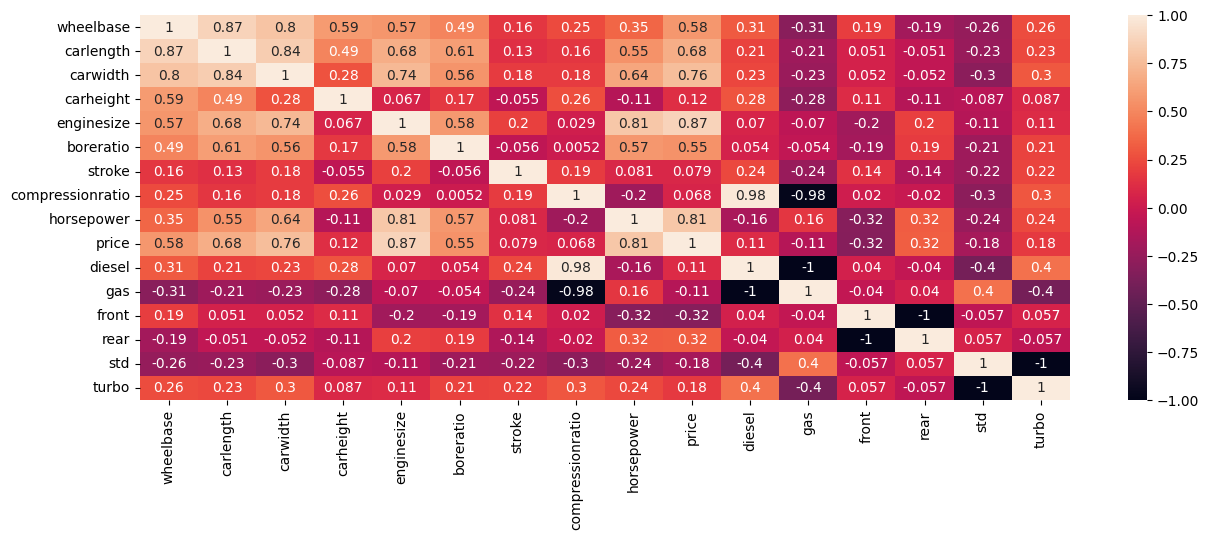

In [125]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(new.corr(),annot=True)
plt.show()

In [126]:
new.columns
new=new[['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'price',
       'diesel', 'rear', 'turbo']]

In [127]:
new.to_csv('cleaned_car_data.csv')

In [128]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(new, train_size = 0.7, test_size = 0.3, random_state = 1)

In [129]:
df_train

,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,price,diesel,rear,turbo
124,95.9,173.2,66.3,50.2,156,3.59,3.86,7.0,145,12764.0,0,0,1
181,104.5,187.8,66.5,54.1,161,3.27,3.35,9.2,156,15750.0,0,0,0
154,95.7,169.7,63.6,59.1,92,3.05,3.03,9.0,62,7898.0,0,0,0
53,93.1,166.8,64.2,54.1,91,3.03,3.15,9.0,68,6695.0,0,0,0
94,94.5,165.3,63.8,54.5,97,3.15,3.29,9.4,69,7299.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,99.1,186.6,66.5,56.1,121,3.54,3.07,9.3,110,12170.0,0,0,0
137,99.1,186.6,66.5,56.1,121,3.54,3.07,9.0,160,18620.0,0,0,1
72,96.6,180.3,70.5,50.8,234,3.46,3.10,8.3,155,35056.0,0,0,0
140,93.3,157.3,63.8,55.7,108,3.62,2.64,8.7,73,7603.0,0,0,0


In [130]:
df_test

,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,price,diesel,rear,turbo
78,93.7,157.3,64.4,50.8,92,2.97,3.230,9.4,68,6669.0,0,0,0
97,94.5,170.2,63.8,53.5,97,3.15,3.290,9.4,69,7999.0,0,0,0
151,95.7,158.7,63.6,54.5,92,3.05,3.030,9.0,62,6338.0,0,0,0
44,94.5,155.9,63.6,52.0,90,3.03,3.110,9.6,70,8916.5,0,0,0
40,96.5,175.4,62.5,54.1,110,3.15,3.580,9.0,86,10295.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,96.5,175.4,65.2,54.1,110,3.15,3.580,9.0,86,8845.0,0,0,0
110,114.2,198.9,68.4,58.7,152,3.70,3.520,21.0,95,13860.0,1,0,1
164,94.5,168.7,64.0,52.6,98,3.19,3.030,9.0,70,8238.0,0,0,0
56,95.3,169.0,65.7,49.6,70,3.33,3.255,9.4,101,11845.0,0,0,0


In [131]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 
       'diesel', 'rear', 'turbo']]
y_train = df_train['price']
# df_test_predict = X_train.iloc[0:1]
lm = LinearRegression()
model = lm.fit(X_train, y_train)


In [132]:
# Testing
data = df_test.iloc[10:11]
actual_price = data.pop('price')

print(data)
predicted_price = model.predict(data)
print("Actual price",actual_price)
print("predicted price",predicted_price)

# print(df_test.iloc[0:1])

   wheelbase  carlength  carwidth  carheight  enginesize  boreratio  stroke  \
4       99.4      176.6      66.4       54.3         136       3.19     3.4   

   compressionratio  horsepower  diesel  rear  turbo  
4               8.0         115       0     0      0  
Actual price 4    17450.0
Name: price, dtype: float64
predicted price [15297.14915334]


In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Assuming df_test is your test set and model is your trained regression model
X_test = df_test.drop(columns=['price'])
y_test = df_test['price']

# Predict the prices for the test set
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

Mean Absolute Error (MAE): 2389.66
Mean Squared Error (MSE): 12507746.81
Root Mean Squared Error (RMSE): 3536.63
R-squared (R2 ): 0.79
